In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import re
from tabulate import tabulate

df = pd.read_csv(
    r"C:\Users\Vision\Downloads\goodreads_books.csv",
    low_memory=False 
)

df.head()


,id,title,link,series,cover_link,author,author_link,rating_count,review_count,average_rating,...,isbn13,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description
0,630104,Inner Circle,https://www.goodreads.com//book/show/630104.In...,(Private #5),https://i.gr-assets.com/images/S/compressed.ph...,"Kate Brian, Julian Peploe",https://www.goodreads.com/author/show/94091.Ka...,7597,196,4.03,...,9781416950417,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"726458, 726458, 1537534, 3047848, 1651302, 304...","381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...
1,9487,A Time to Embrace,https://www.goodreads.com//book/show/9487.A_Ti...,(Timeless Love #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,4179,177,4.35,...,9781595542328,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"127352, 127352, 40642197, 127353, 127354, 3891...",115036,"Ideje az Ã¶lelÃ©snek TÃ¶rtÃ©net a remÃ©nyrÅl,..."
2,6050894,Take Two,https://www.goodreads.com//book/show/6050894-t...,(Above the Line #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,6288,218,4.23,...,NaN,NaN,"Bloomington, Indiana(United States)",NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"706250, 706250, 666481, 11942636, 706241, 1273...","4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...
3,39030,Reliquary,https://www.goodreads.com//book/show/39030.Rel...,(Pendergast #2),https://i.gr-assets.com/images/S/compressed.ph...,"Douglas Preston, Lincoln Child",https://www.goodreads.com/author/show/12577.Do...,38382,1424,4.01,...,9780765354952,NaN,"New York State(United States) New York City, N...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"39026, 39026, 11007668, 3986318, 51887330, 194...","67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN
4,998,The Millionaire Next Door: The Surprising Secr...,https://www.goodreads.com//book/show/998.The_M...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Thomas J. Stanley, William D. Danko",https://www.goodreads.com/author/show/659.Thom...,72168,3217,4.04,...,9780671015206,NaN,NaN,NaN,Independent Publisher Book Award (IPPY) Nomine...,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"1052, 1052, 763362, 69571, 78427, 30186948, 10...",NaN,The incredible national bestseller that is cha...


In [4]:
df.isnull().sum()


id                            0
title                         0
link                          0
series                    28880
cover_link                  607
author                        0
author_link                   0
rating_count                  0
review_count                  0
average_rating                0
five_star_ratings             0
four_star_ratings             0
three_star_ratings            0
two_star_ratings              0
one_star_ratings              0
number_of_pages            2330
date_published              860
publisher                  3636
original_title            12949
genre_and_votes            2840
isbn                      11883
isbn13                    12692
asin                      46963
settings                  40684
characters                38504
awards                    41573
amazon_redirect_link          0
worldcat_redirect_link     3985
recommended_books          3994
books_in_series           30121
description                2575
dtype: i

In [6]:
df = df[['title', 'author', 'description', 'average_rating', 'rating_count']]


In [7]:
df.dropna(inplace=True)


In [8]:
df['content'] = (
    df['title'] + ' ' +
    df['author'] + ' ' +
    df['description']
)


In [9]:
df.head()

,title,author,description,average_rating,rating_count,content
0,Inner Circle,"Kate Brian, Julian Peploe",Reed Brennan arrived at Easton Academy expecti...,4.03,7597,"Inner Circle Kate Brian, Julian Peploe Reed Br..."
1,A Time to Embrace,Karen Kingsbury,"Ideje az Ã¶lelÃ©snek TÃ¶rtÃ©net a remÃ©nyrÅl,...",4.35,4179,A Time to Embrace Karen Kingsbury Ideje az Ã¶l...
2,Take Two,Karen Kingsbury,Filmmakers Chase Ryan and Keith Ellison have c...,4.23,6288,Take Two Karen Kingsbury Filmmakers Chase Ryan...
4,The Millionaire Next Door: The Surprising Secr...,"Thomas J. Stanley, William D. Danko",The incredible national bestseller that is cha...,4.04,72168,The Millionaire Next Door: The Surprising Secr...
5,Black Sheep,Georgette Heyer,With her high-spirited intelligence and good l...,4.05,9538,Black Sheep Georgette Heyer With her high-spir...


In [10]:
df = df[['title', 'author', 'description', 'average_rating', 'rating_count']]


In [11]:
df.isnull().sum()


title             0
author            0
description       0
average_rating    0
rating_count      0
dtype: int64

In [12]:
df.dropna(subset=['title', 'author', 'description'], inplace=True)


In [13]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)          # remove line breaks
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove numbers & symbols
    text = re.sub(r'\s+', ' ', text)         # remove extra spaces
    return text

df['description'] = df['description'].apply(clean_text)
df['title'] = df['title'].apply(clean_text)
df['author'] = df['author'].apply(clean_text)


In [14]:
df.shape

(49624, 5)

In [15]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\Vision\Downloads\goodreads_books.csv",
    low_memory=False
)


In [16]:
df.head()


,id,title,link,series,cover_link,author,author_link,rating_count,review_count,average_rating,...,isbn13,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description
0,630104,Inner Circle,https://www.goodreads.com//book/show/630104.In...,(Private #5),https://i.gr-assets.com/images/S/compressed.ph...,"Kate Brian, Julian Peploe",https://www.goodreads.com/author/show/94091.Ka...,7597,196,4.03,...,9781416950417,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"726458, 726458, 1537534, 3047848, 1651302, 304...","381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...
1,9487,A Time to Embrace,https://www.goodreads.com//book/show/9487.A_Ti...,(Timeless Love #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,4179,177,4.35,...,9781595542328,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"127352, 127352, 40642197, 127353, 127354, 3891...",115036,"Ideje az Ã¶lelÃ©snek TÃ¶rtÃ©net a remÃ©nyrÅl,..."
2,6050894,Take Two,https://www.goodreads.com//book/show/6050894-t...,(Above the Line #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,6288,218,4.23,...,NaN,NaN,"Bloomington, Indiana(United States)",NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"706250, 706250, 666481, 11942636, 706241, 1273...","4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...
3,39030,Reliquary,https://www.goodreads.com//book/show/39030.Rel...,(Pendergast #2),https://i.gr-assets.com/images/S/compressed.ph...,"Douglas Preston, Lincoln Child",https://www.goodreads.com/author/show/12577.Do...,38382,1424,4.01,...,9780765354952,NaN,"New York State(United States) New York City, N...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"39026, 39026, 11007668, 3986318, 51887330, 194...","67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN
4,998,The Millionaire Next Door: The Surprising Secr...,https://www.goodreads.com//book/show/998.The_M...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Thomas J. Stanley, William D. Danko",https://www.goodreads.com/author/show/659.Thom...,72168,3217,4.04,...,9780671015206,NaN,NaN,NaN,Independent Publisher Book Award (IPPY) Nomine...,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"1052, 1052, 763362, 69571, 78427, 30186948, 10...",NaN,The incredible national bestseller that is cha...


In [17]:
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.head()


,id,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages
0,630104,7597,196,4.03,3045,2323,1748,389,92,220.0
1,9487,4179,177,4.35,2255,1290,518,93,23,400.0
2,6050894,6288,218,4.23,3000,2020,1041,183,44,320.0
3,39030,38382,1424,4.01,12711,15407,8511,1429,324,464.0
4,998,72168,3217,4.04,27594,25219,14855,3414,1086,258.0


In [18]:
corr = num_df.corr()


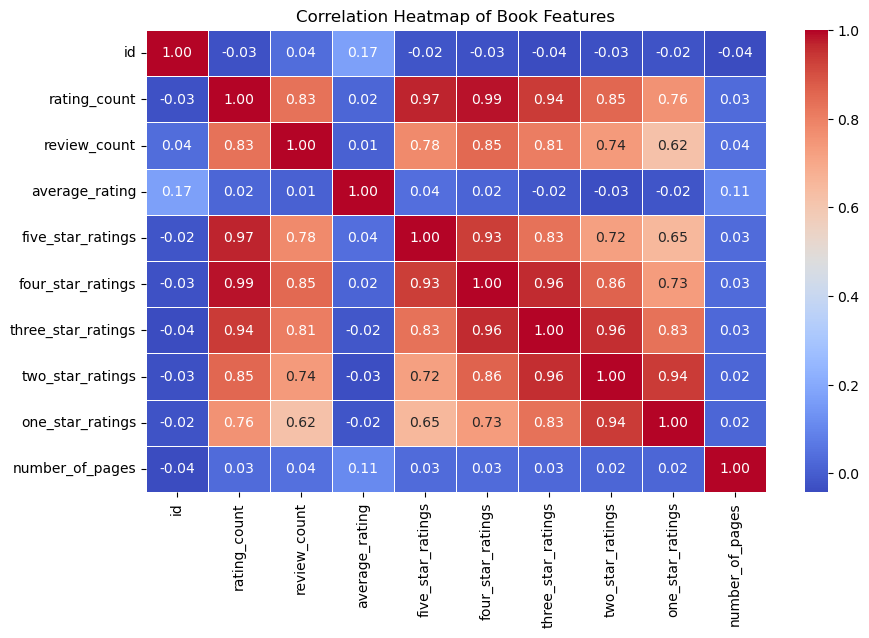

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Book Features")
plt.show()


In [20]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52199 entries, 0 to 52198
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      52199 non-null  int64  
 1   title                   52199 non-null  object 
 2   link                    52199 non-null  object 
 3   series                  23319 non-null  object 
 4   cover_link              51592 non-null  object 
 5   author                  52199 non-null  object 
 6   author_link             52199 non-null  object 
 7   rating_count            52199 non-null  int64  
 8   review_count            52199 non-null  int64  
 9   average_rating          52199 non-null  float64
 10  five_star_ratings       52199 non-null  int64  
 11  four_star_ratings       52199 non-null  int64  
 12  three_star_ratings      52199 non-null  int64  
 13  two_star_ratings        52199 non-null  int64  
 14  one_star_ratings        52199 non-null

Index(['id', 'title', 'link', 'series', 'cover_link', 'author', 'author_link',
       'rating_count', 'review_count', 'average_rating', 'five_star_ratings',
       'four_star_ratings', 'three_star_ratings', 'two_star_ratings',
       'one_star_ratings', 'number_of_pages', 'date_published', 'publisher',
       'original_title', 'genre_and_votes', 'isbn', 'isbn13', 'asin',
       'settings', 'characters', 'awards', 'amazon_redirect_link',
       'worldcat_redirect_link', 'recommended_books', 'books_in_series',
       'description'],
      dtype='object')

In [21]:
df.isnull().sum()

# Preview duplicates
df.duplicated().sum()

0

In [22]:
df.drop_duplicates(inplace=True)


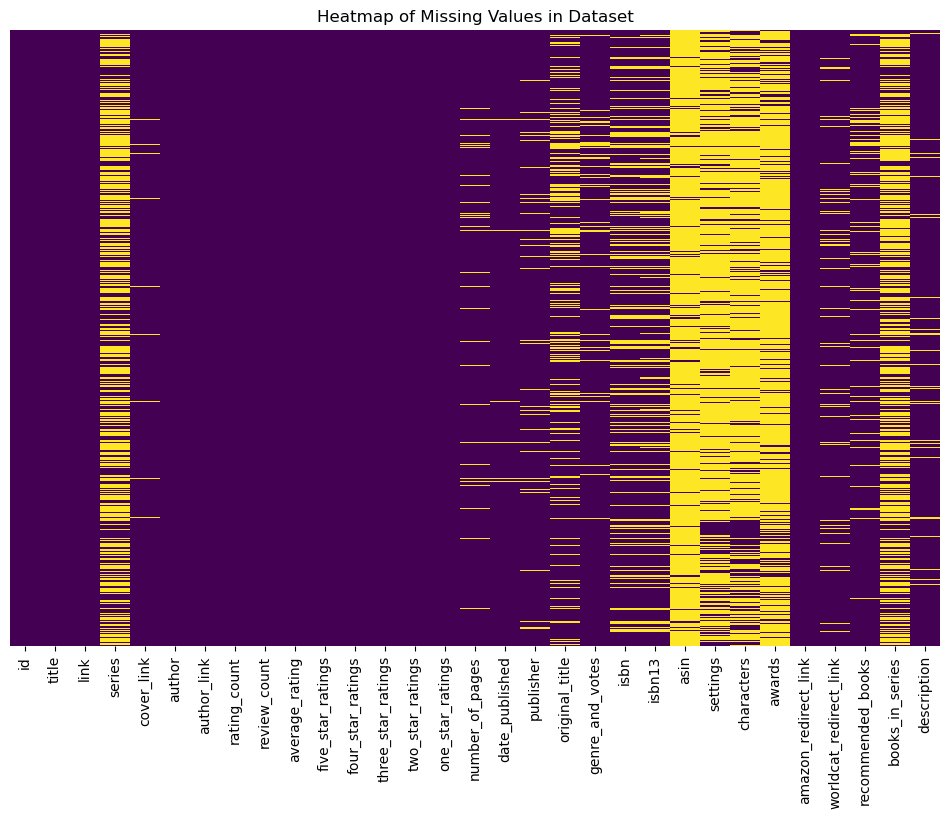

In [23]:
plt.figure(figsize=(12, 8))

# Create heatmap of missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

# Add title
plt.title("Heatmap of Missing Values in Dataset")
plt.show()


Checking for missing values:
id                            0
title                         0
link                          0
series                    28880
cover_link                  607
author                        0
author_link                   0
rating_count                  0
review_count                  0
average_rating                0
five_star_ratings             0
four_star_ratings             0
three_star_ratings            0
two_star_ratings              0
one_star_ratings              0
number_of_pages            2330
date_published              860
publisher                  3636
original_title            12949
genre_and_votes            2840
isbn                      11883
isbn13                    12692
asin                      46963
settings                  40684
characters                38504
awards                    41573
amazon_redirect_link          0
worldcat_redirect_link     3985
recommended_books          3994
books_in_series           30121
descriptio

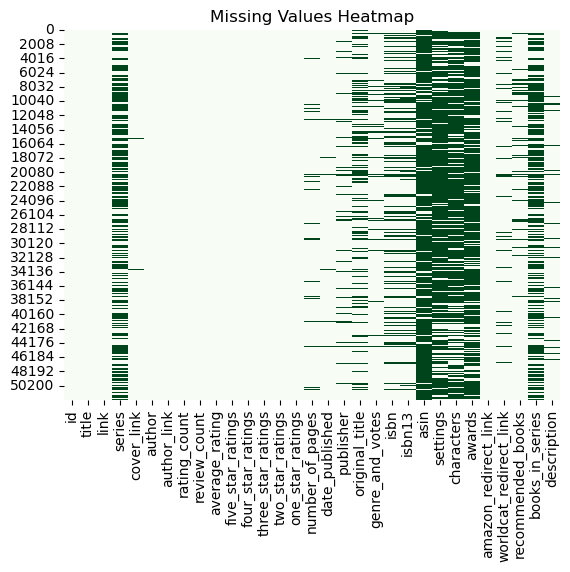

In [24]:
missing_values = df.isnull().sum()

print("\nChecking for missing values:")
print(missing_values)


sns.heatmap(df.isnull(), cbar=False, cmap='Greens')
plt.title("Missing Values Heatmap")

# Check for missing values and handle accordingly
if missing_values.sum() == 0:
    print("No missing values were found")
else:
    print("There are missing values in the dataset.")
plt.show()

In [25]:
duplicate_rows = df.duplicated()

print("\nChecking for duplicate values:")
print(f"Total duplicate rows: {duplicate_rows.sum()}")


if duplicate_rows.sum() > 0:
    print("Duplicate rows found!")
    print(data[duplicate_rows])
else:
    print("No duplicate rows were found.")


Checking for duplicate values:
Total duplicate rows: 0
No duplicate rows were found.


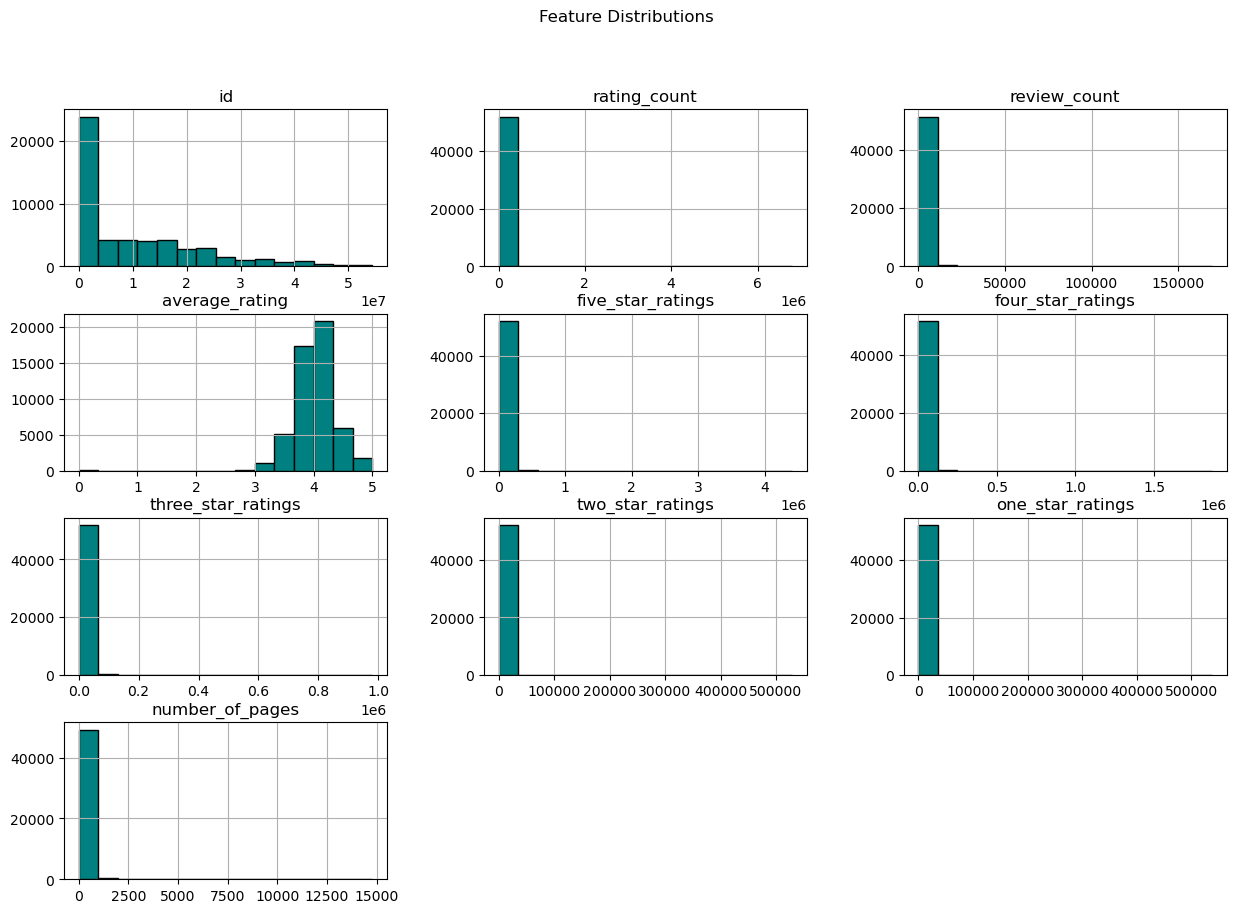

In [26]:
df.hist(bins=15, figsize=(15, 10), color='teal', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

In [27]:
df['description'] = df['description'].fillna('')  # Replace missing values with empty string


In [28]:
# Required imports
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
df['description'] = df['description'].fillna('')  # Replace NaN with empty string

tfidf = TfidfVectorizer(stop_words='english')  # remove common words like "the", "and"
tfidf_matrix = tfidf.fit_transform(df['description'].fillna(''))  # make sure no NaN


In [29]:
missing_counts = df.isnull().sum()
print(missing_counts)

id                            0
title                         0
link                          0
series                    28880
cover_link                  607
author                        0
author_link                   0
rating_count                  0
review_count                  0
average_rating                0
five_star_ratings             0
four_star_ratings             0
three_star_ratings            0
two_star_ratings              0
one_star_ratings              0
number_of_pages            2330
date_published              860
publisher                  3636
original_title            12949
genre_and_votes            2840
isbn                      11883
isbn13                    12692
asin                      46963
settings                  40684
characters                38504
awards                    41573
amazon_redirect_link          0
worldcat_redirect_link     3985
recommended_books          3994
books_in_series           30121
description                   0
dtype: i

In [30]:
df = df.drop(columns=[
    'asin', 'awards', 'settings',
    'characters', 'books_in_series', 'series'
])


In [31]:
#Content based
features = ['title', 'author', 'genre_and_votes', 'description']
df = df[features]


In [32]:
df['combined_features'] = (
    df['title'] + ' ' +
    df['author'] + ' ' +
    df['genre_and_votes'] + ' ' +
    df['description']
)


In [33]:
df = df[['title', 'author', 'description', 'genre_and_votes']]

df = df.fillna('')
df.head()


,title,author,description,genre_and_votes
0,Inner Circle,"Kate Brian, Julian Peploe",Reed Brennan arrived at Easton Academy expecti...,"Young Adult 161, Mystery 45, Romance 32"
1,A Time to Embrace,Karen Kingsbury,"Ideje az Ã¶lelÃ©snek TÃ¶rtÃ©net a remÃ©nyrÅl,...","Christian Fiction 114, Christian 45, Fiction 3..."
2,Take Two,Karen Kingsbury,Filmmakers Chase Ryan and Keith Ellison have c...,"Christian Fiction 174, Christian 81, Fiction 58"
3,Reliquary,"Douglas Preston, Lincoln Child",,"Thriller 626, Mystery 493, Horror 432, Fiction..."
4,The Millionaire Next Door: The Surprising Secr...,"Thomas J. Stanley, William D. Danko",The incredible national bestseller that is cha...,"Economics-Finance 1162, Nonfiction 910, Busine..."


In [34]:
df['content'] = (
    df['title'] + ' ' +
    df['author'] + ' ' +
    df['genre_and_votes'] + ' ' +
    df['description']
)


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=10000
)

tfidf_matrix = tfidf.fit_transform(df['content'])

tfidf_matrix.shape


(52199, 10000)

In [88]:

df['description'] = df['description'].fillna('')
# 🔹 TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])

def recommend_books(book_title, n=5):
    # Case-insensitive & partial matching
    matches = df[df['title'].str.contains(book_title, case=False, na=False)]

    if matches.empty:
        return "❌ Book not found. Try exact or partial title."

    # Use first matched book
    idx = matches.index[0]

    # Compute cosine similarity
    sim_scores = cosine_similarity(
        tfidf_matrix[idx],
        tfidf_matrix
    ).flatten()
    # Sort similarity scores
    similar_indices = sim_scores.argsort()[::-1]
    similar_indices = similar_indices[similar_indices != idx]
    similar_indices = similar_indices[:n]
    recommended = df[['title', 'author']].iloc[similar_indices].copy()
    recommended['similarity_score'] = sim_scores[similar_indices]

    # Sort by similarity score
    recommended = recommended.sort_values(
        by='similarity_score',
        ascending=False
    )

    return recommended

book_name = input("Enter a book title: ")
result = recommend_books(book_name)
if isinstance(result, str):
    print(result)
else:
    print("\nRecommended Books (textual similarity of book descriptions):\n")
    print(tabulate(
        result,
        headers='keys',
        tablefmt='fancy_grid',
        showindex=False
    ))


Enter a book title:  joe



Recommended Books (textual similarity of book descriptions):

╒═════════════════════════════════════════╤══════════════════════════╤════════════════════╕
│ title                                   │ author                   │   similarity_score │
╞═════════════════════════════════════════╪══════════════════════════╪════════════════════╡
│ Alice in the Country of Hearts, Vol. 01 │ QuinRose, Soumei Hoshino │           0.181606 │
├─────────────────────────────────────────┼──────────────────────────┼────────────────────┤
│ Billionaire Boy                         │ David Walliams           │           0.180351 │
├─────────────────────────────────────────┼──────────────────────────┼────────────────────┤
│ Joe                                     │ H.D. Gordon              │           0.157613 │
├─────────────────────────────────────────┼──────────────────────────┼────────────────────┤
│ The Vintage Coat                        │ Chris   Turnbull         │           0.143332 │
├────────────────

In [90]:

df['genre_and_votes'] = df['genre_and_votes'].fillna('')
tfidf_genre = TfidfVectorizer(stop_words='english')
genre_matrix = tfidf_genre.fit_transform(df['genre_and_votes'])

def recommend_books_by_genre(book_title, n=5):
    # Case-insensitive & partial match
    matches = df[df['title'].str.contains(book_title, case=False, na=False)]

    if matches.empty:
        return "❌ Book not found. Try exact or partial title."

    idx = matches.index[0]
    sim_scores = cosine_similarity(
        genre_matrix[idx],
        genre_matrix
    ).flatten()

    # Sort similarity scores
    similar_indices = sim_scores.argsort()[::-1]

    # Remove the same book
    similar_indices = similar_indices[similar_indices != idx]
    similar_indices = similar_indices[:n]

    # Prepare output
    recommended = df[['title', 'author', 'genre_and_votes']].iloc[similar_indices].copy()
    recommended['similarity_score'] = sim_scores[similar_indices]

    # Sort by similarity
    recommended = recommended.sort_values(
        by='similarity_score',
        ascending=False
    )

    return recommended
book_name = input("Enter a book title: ")

result = recommend_books_by_genre(book_name)

if isinstance(result, str):
    print(result)
else:
    print("\nRecommended Books (Genre-Based Content Filtering):\n")
    print(tabulate(
        result,
        headers='keys',
        tablefmt='fancy_grid',
        showindex=False
    ))


Enter a book title:  ok



Recommended Books (Genre-Based Content Filtering):

╒═══════════════════════════════════════════════════════╤═══════════════════════════════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════╕
│ title                                                 │ author                                    │ genre_and_votes                                                                                                                                                                        │   similarity_score │
╞═══════════════════════════════════════════════════════╪═══════════════════════════════════════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪════════════════════╡
│ Going Rogue: An Ameri

In [100]:
from sklearn.metrics.pairwise import cosine_similarity
from tabulate import tabulate  # new library

def recommend_books(book_title, n=5):
    if book_title not in df['title'].values:
        return "❌ Book not found. Try exact title."

    # Get index of the book
    idx = df[df['title'] == book_title].index[0]

    # Compute cosine similarity between the selected book and all others
    sim_scores = cosine_similarity(
        tfidf_matrix[idx],
        tfidf_matrix
    ).flatten()

    # Get indices of top n similar books (excluding the book itself)
    similar_indices = sim_scores.argsort()[::-1][1:n+1]

    # Retrieve recommended book titles and authors
    recommended = df[['title', 'author']].iloc[similar_indices]
    
    return recommended

# 🔹 Terminal input
book_name = input("Enter a book title: ")
result = recommend_books(book_name)

# 🔹 Pretty print using tabulate
if isinstance(result, str):
    print(result)  # Book not found
else:
    print("\nRecommended Books:")
    print(tabulate(result, headers='keys', tablefmt='fancy_grid', showindex=False))


Enter a book title:  Silence



Recommended Books:
╒══════════════════════╤═══════════════════╕
│ title                │ author            │
╞══════════════════════╪═══════════════════╡
│ Broken Silence       │ Natasha Preston   │
├──────────────────────┼───────────────────┤
│ Love, Lucas          │ Chantele Sedgwick │
├──────────────────────┼───────────────────┤
│ When It's Real       │ Erin Watt         │
├──────────────────────┼───────────────────┤
│ Touching Spirit Bear │ Ben Mikaelsen     │
├──────────────────────┼───────────────────┤
│ Barren Ground        │ Ellen Glasgow     │
╘══════════════════════╧═══════════════════╛
